<a href="https://colab.research.google.com/github/OH1107/Kaggle/blob/main/Titanic%3A%20Machine%20Learning%20from%20Disaster/Kaggle_Titanic_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Challenge

## Part 1 : 데이터 준비 및 모듈 임포트

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

### CSV to DF
- csv를 임포트하여 데이터셋이 `pandas DataFrame`이 되도록 호출

In [4]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/독학_글로벌엑스퍼트/글로벌엑스퍼트-타이타닉-강의자료-학습도우미/titanic/test.csv')
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/독학_글로벌엑스퍼트/글로벌엑스퍼트-타이타닉-강의자료-학습도우미/titanic/train.csv')

### 데이터프레임을 보는 다양한 방법

`head()` 첫 5행을 볼 수 있음

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
# head를 빼면 전부 축약되서 출력
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


`tail()` 마지막 5행을 볼 수 있음

In [11]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


`describe()` 각 열의 통계적인 면을 보여줌

기본은 연속된 값을 가진 열만 보여주나 `include='all'로 세팅하면 모두 볼 수 있음

In [14]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Moen, Mr. Sigurd Hansen",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# ()을 빼면 한 줄 한 줄 출력
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

`dtypes` 모든 열의 데이터 종류를 보여줌

In [17]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

`info()` 는 `dtypes` 의 좀  더 발전된 개념으로 데이터 타입뿐만 아니라 빈칸이 아닌 갯수까지 보여줌

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`columns`은 데이터 프레임의 열의 제목들을 보여줌

In [19]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

`shape` 은 행의 갯수와 열의 갯수를 보여줌

In [20]:
train.shape

(891, 12)

## Part 2 : 파일 병합

* ntrain과 ntest의 shape을 확보 (병합 한 것을 나중에 다시 갈라 놓기 위한 준비)
* y_train은 알려진 결과 값이니 따로 저장
* 테스트의 승객 아이디는 나중에 최종 결과에 넣을 것이기 때문에 따로 저장
* train과 test를 병합하여 data 란 파일을 만듦.
  - 문자로 된 것을 숫자로 바꾼다든가. 숫자를 인터발 별로 그룹화 한다든가 할 때 한꺼번에 하기 위해 병합

In [21]:
# 병합 준비
ntrain = train.shape[0]
ntest = test.shape[0]

# 아래는 따로 저장
y_train = train['Survived'].values
passId = test['PassengerId']

# 병함 파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))

data size is: (1309, 12)


In [22]:
# ntrain 값
ntrain

891

In [23]:
# ntest 값
ntest

418

In [26]:
y_train[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [27]:
passId[:10]

0    892
1    893
2    894
3    895
4    896
5    897
6    898
7    899
8    900
9    901
Name: PassengerId, dtype: int64

In [28]:
# train과 test를 합친 data
# test에서 "Survived"는 빈칸(NaN - Not a Number)이 나타남 - 우리가 예측해야할 값
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

train 데이터에 있는 인원 중 342명이 살아남고 549명이 사망했다는 것을 볼 수 있음

## Part 3 : 파일 탐색

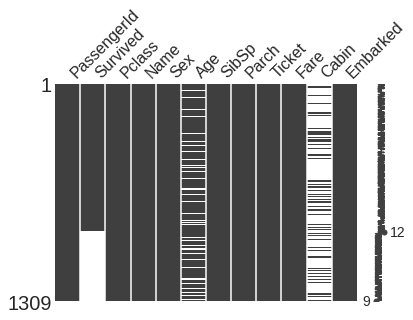

In [30]:
missingno.matrix(data, figsize = (6,4))

위 도표는 빈 값을 직관적으로 볼 수 있음.  
아래 쪽 Survived가 비어 있는데 이 것은 `test`에 우리가 답으로 예측해야 하는 부분

In [31]:
# null 값 체크
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [32]:
data.isna().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

data.isnull.any() - 전체에 빈값이 있나 없나?  isna를 써도 같음 - 각 항목 별로

data.isnull.sum() - 전체 각 항목 중 빈칸이 몇 개나 있나?

data.isnull.any().any() - 전체에 빈값이 있나 없나? - 전체 True / False


In [33]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Features 항목

#### 항목의 종류 

- 범주형 항목 (Categorical Features)

  - 범주형 항목은 범주형 변수로 된 항목으로 범주형 변수는 둘 이상의 결과 요소가 있는 변수이며 해당 기능의 각 값을 범주별로 분류 

  - 예를 들어 성별은 두 가지 범주 (남성과 여성)의 범주 형 변수 

  - 이산형 변수(discrete variable) = 범주형 변수 (categorical variable) 의 하나로 명목 변수 norminal variable

        데이터 셋에서 명목 항목 : Sex, Embark 이며 우리는 Name, Ticket 등을 이로 변환해야 함 


- 순서형 변수 (Ordinal Variable)
  - 순위 변수는 범주 형의 하나지만 그 차이점은 값 사이의 상대 순서(=서열) 또는 정렬이 가능

        데이터 셋에서 순위 항목 : PClass 이며 우리는 Cabin을 이 범주로 변환해서 사용해야 함


- 연속형 항목 (Continuous Features):

  - 서로 연속된 값을 가진 변수를 가진 항목이며 여기에서 우리는 연령을 대표적인 것으로 볼 수 있음

        Age, SipSp, Parch, Fare는 interval variable로 만들어 이에 적용해야 함

 

* 아래의 항목에서 columns 이름 확인

          Variable          정의                Key

          survival          생존 여부            0 = No, 1 = Yes

          pclass            선실 등급            1 = 1st, 2 = 2nd, 3 = 3rd

          sex               성별    

          Age               나이  

          sibsp             형재 자매의 수/ 배우자 등이 승선한 경우 수    

          parch             부모나 자식과 같이 탄 경우 수   

          ticket            표 번호    

          fare              요금

          cabin             선실 번호   

          embarked          승선한 항구         C = Cherbourg, Q = Queenstown, S = Southampton

## Part 4 : 데이터 탐구 (Exploartory Data Analysis)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 데이터 각 column의 상관관계

  - `Co-relation 매트릭스`는 `seaborn`에서 변수 간 상관 계수를 보여주는 표
  - 표의 각 셀은 두 변수 간의 상관 관계를 보여줌
  - 상관 매트릭스는 고급 분석에 대한 입력 및 고급 분석에 대한 진단으로 데이터를 요약하는 데 사용
    - ref : https://seaborn.pydata.org/examples/many_pairwise_correlations.html

- 아래 마스크 셋업은 0으로 행렬을 상관 행렬과 같은 모양으로 만든 후 여기에 불리안 값을 넣고 이를 다시 True만 만듦

- triu 는 우측 상단 삼각행렬을 의미

- annot= True는 각 셀에 숫자를 표시하라는 것이고, False는 하지 말라는 것

- 이어서 이를 heatmap으로 시각화

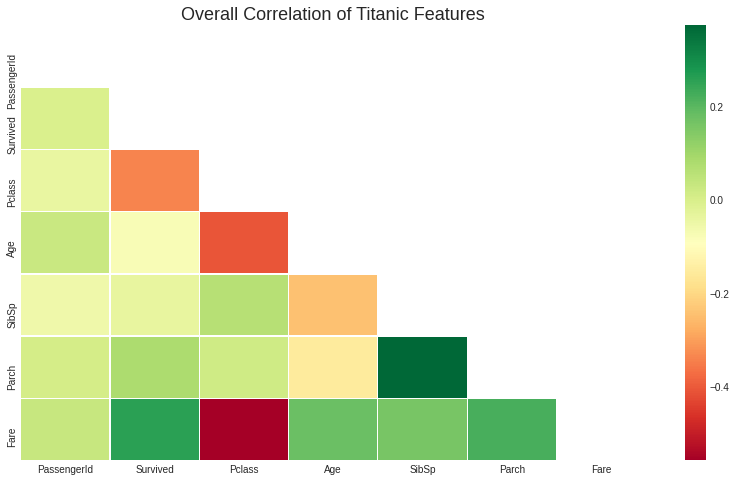

In [35]:
# Co-relation 매트릭스
corr = data.corr()

# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 그래프 셋업
plt.figure(figsize=(14, 8))

# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)

#  Co-relation 매트릭스 시각화
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

### "Surived" 분석
  - Survived - Key: (0 - Not Survived, 1- Survived)

  - Survived는 숫자로 값을 주지만 범주형 변수(Categorical Variable)인 셈

  - 죽던지 살던지 둘 중 하나의 값 부여

  - countplot 시각화

  - 사이즈는 가로 10인치 세로 2인치

  - 생존 여부 0과 1의 count값


0    549
1    342
Name: Survived, dtype: int64


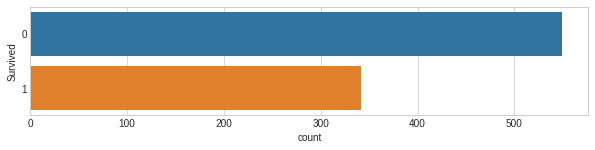

In [36]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

- 전체 사망자 비율 확인하고자 함
  - `pie plot`과 `count plot`을 서브플롯으로 시각화
  - 행은 하나 열은 2개의 서브 플롯

- 'Survived'의 `pie plot`
  - `explode`가 1이면 튀어 나가는 것인데 0을 주면 분리만 되고 돌출은 되지 않음
  - 0, 1인 것은 첫 번째 것은 아니고 두번 째 것은 분리된다는 의미로 생각하시면 됩니다.
  - autopercent는 1.1이 표현하는 부분은 소수점 한 자리까지 보여 주라는 의미

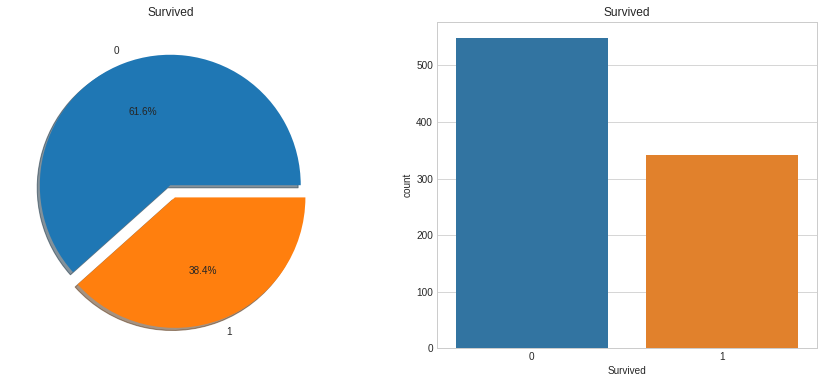

In [46]:
f,ax=plt.subplots(1, 2, figsize=(15, 6))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- `pie plot`과 `count plot`을 함께 출력하는 함수 정의

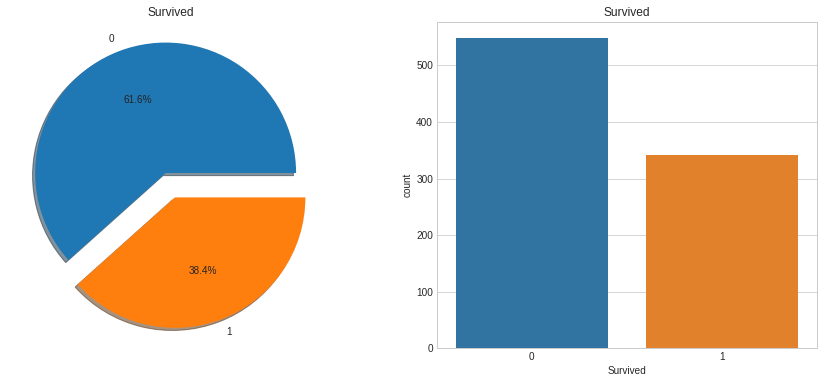

In [54]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()

piecount('Survived')

### "Pclass" 분석
  - Pclass는 값이 숫자이나 서열이 정해진 순서형 변수 (Ordinal Feature)
  - Key : 1 = 1st, 2 = 2nd, 3 = 3rd
  - 각 클래스 당 생존자 확인하고자 함

In [47]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [52]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 1등급 객실의 사람들은 생존자가 더 많음
- 2등급은 생존자에 비해 사망자가 조금 더 많음
- 3등급은 사망자가 3배 이상 많음

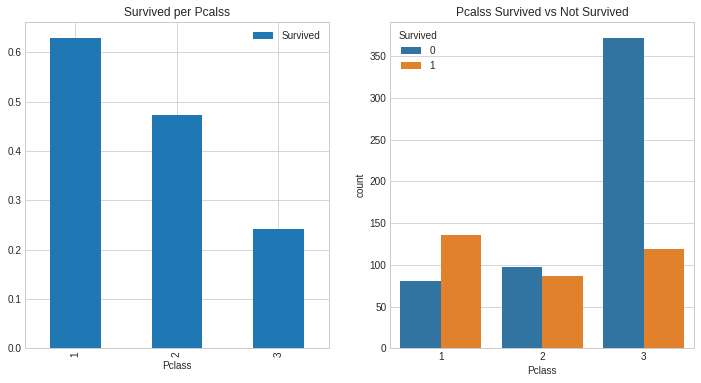

In [53]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')
plt.show()

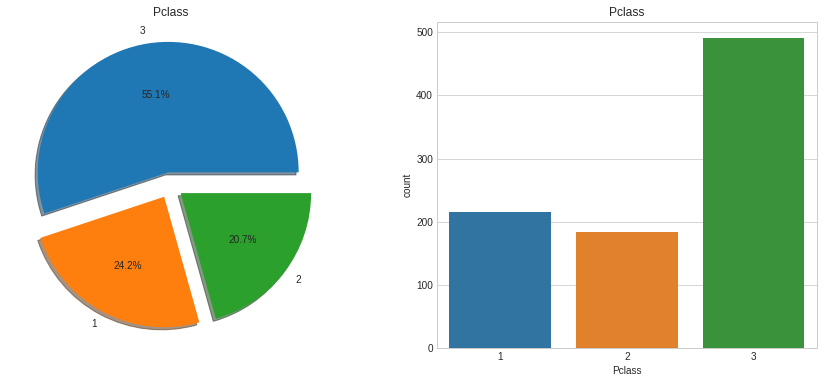

In [55]:
piecount("Pclass")

* 사망자 백분율은 3등칸이 반이 넘으나 위의 그래프에서 생존자는 1등석이 가장 많다는 것을 알 수 있음

### "Name" 분석
  - 이름은 거의 모두 다름
        Family Name, First Name, Middle Name and even Dr. Capt, master 등
  - 리스트 확인 후 분류 작업 실시

In [56]:
data.Name.value_counts()

Kelly, Mr. James                                   2
Connolly, Miss. Kate                               2
Moen, Mr. Sigurd Hansen                            1
Skoog, Mrs. William (Anna Bernhardina Karlsson)    1
McCrae, Mr. Arthur Gordon                          1
                                                  ..
Goodwin, Mrs. Frederick (Augusta Tyler)            1
Touma, Mrs. Darwis (Hanne Youssef Razi)            1
Roebling, Mr. Washington Augustus II               1
Herman, Miss. Kate                                 1
Brobeck, Mr. Karl Rudolf                           1
Name: Name, Length: 1307, dtype: int64

- 이름은 매우 다양하기에 호칭으로 분류
- ['Initial']이란 열을 새로 만들어서 여기에 Name에서 추출한 정규표현 (Regular Expression)을 추가
- 아래에서 str.extract('([A-Za-z]+).')부분은 str에서 대문자 A~Z, 소문자 a~z 중에 . 명령을 통해 .으로 끝나는 부분을 추출
- ('^([A-Za-z]+)')으로 하면 처음에 나오는 문자 덩어리가 될 것이고 +를 빼면 첫 스펠링 한 글자만 추출

In [74]:
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z0-9]+)\.')

In [75]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Jonkheer      1
Lady          1
Sir           1
Don           1
Dona          1
Countess      1
Mme           1
Capt          1
Name: Initial, dtype: int64

Miss나 Mr등은 많으나 익숙하지 않은 호칭들이 존재  
이를 성별로 확인하고자 함

In [76]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


- 생존률을 확인하기 위한 함수 정의

In [77]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

- test 에 있는 Dona의 나이를 보고 어디에 포함 시킬지 판단
- Ms. 는 현대처럼 Miss + Mrs를 합친 말이 아니라 당시에는 귀족미망인을 의미
- Mlle나 Mme등도 마드모아젤과 마담의 줄인말일 경우일 것(귀족 여성)

In [78]:
temp.loc[temp['Initial'] == 'Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona


나이로 추측해서 Mrs.로 변경

In [79]:
temp.loc[temp['Initial'] == 'Dona', 'Initial'] = 'Mrs'

In [80]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


- 성을 추출하는 작업
- ML은 알파벳보다 숫자를 좋아하므로 숫자로 변환

In [81]:
temp['NumInit'] = temp['Initial'].factorize()[0]

In [82]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [83]:
temp['NumName'] = temp['LastName'].factorize()[0]

In [84]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap='summer_r')

In [85]:
temp.loc[temp['NumName'] == 27]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,NumInit,LastName,NumName
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,2,O,27
47,48,1.0,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,Miss,2,O,27
186,187,1.0,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,Mrs,1,O,27
364,365,0.0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q,Mr,0,O,27
459,460,0.0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q,Mr,0,O,27
502,503,0.0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,Miss,2,O,27
552,553,0.0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q,Mr,0,O,27
629,630,0.0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,Mr,0,O,27
653,654,1.0,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q,Miss,2,O,27
88,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,Ms,8,O,27


### "Sex" 분석

In [86]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


- 함수를 정의하여 분석

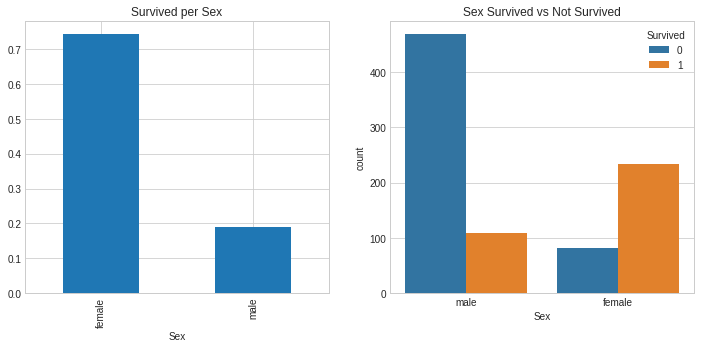

In [87]:
def bag(col, target, title, title1):
    f,ax=plt.subplots(1,2,figsize=(12,5))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()

bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')

- 배에 있던 남자의 수는 여자의 수보다 훨씬 많은.
  - 생존 여성 수는 남성 수의 거의 두 배
  - 선박 여성의 생존율은 약 75 % 인 반면 남성의 생존율은 약 18-19 %
 
- 남성/여성을 분류하는 것보다 좀 더 새분화하고자 함
  - 예를 들어 아기들은 아기이지, 남자인지 여자인지 구명보트 태울 때 안 물어 볼 것이기 때문
  - 또한 귀족 아기인지 서민의 아기인지 분류 가능
  - 생존 Pclass별로 성별을 봅니다.

In [88]:
pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

- 클래스 별 사망자 차이는 확연하게 드러나나, 클래스와 큰 상관없이 남성들이 많은 사망자가 났다는 것을 알 수 있음

- "Sex"항목을 다음과 같이 나누는 것을 시도해보고자 함
  - 먼저 결과 도출 후 재차 시도할 때 분류
- 먼저는 __남자 : 1, 여자 : 2__ 로 분류하고자 함

In [89]:
# temp['Gender'] = 0
# temp.loc[(temp['Sex']=='male') & (temp[Pclass]== 1) ,'Gender']= 1
# temp.loc[(temp['Sex']=='male') & (temp[Pclass]== 2) ,'Gender']= 2
# temp.loc[(temp['Sex']=='male') & (temp[Pclass]== 3) ,'Gender']= 2
# temp.loc[(temp['Sex']=='female') & (temp[Pclass]== 1) ,'Gender']= 3
# temp.loc[(temp['Sex']=='female') & (temp[Pclass]== 2) ,'Gender']= 4
# temp.loc[(temp['Sex']=='female') & (temp[Pclass]== 3) ,'Gender']= 5
# temp.loc[temp['Age']<1.0 ,'Gender']= 6

In [90]:
temp['Gender'] = 0
temp.loc[(temp['Sex']=='male') ,'Gender']= 1
temp.loc[(temp['Sex']=='female'),'Gender']= 2

In [91]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,NumInit,LastName,NumName,Gender
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,Braund,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Cumings,1,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,Heikkinen,2,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle,3,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Allen,4,1
